Abbreviated data preparation for the Wine Quality Problem (Project 1)

In [1]:

# Import Required Libraries  
import matplotlib.pyplot as plt 
import numpy as np 
# This time we need to also import pandas
import pandas as pd 

# Read in white wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';') 

# Read in red wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

# Add `type` column to `red` with price one 
red['type'] = 1
  
# Add `type` column to `white` with price zero 
white['type'] = 0
  
# Append `white` to `red` 
# AFTER THIS WE HAVE ALL WINES (red and white) in a SINGLE pandas DataFrame
wines = red.append(white, ignore_index = True) 

# Import SKLEARN
import sklearn
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 

# Specify the  data - 
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

# Specify the QUALITY target labels and flatten the array 
y = np.ravel(wines.quality) 

# Splitting the data set for training and validating  
X_train, X_val, y_train, y_val = train_test_split( 
                 X, y, test_size = 0.25, random_state = 45) 

# CONVERTING X_train & X_test DataFrame s to TF tensors
# import tensorflow as tf 

Xtrain = X_train.to_numpy()
Xval = X_val.to_numpy()

 # NOW, IN ADDITION, CREATE THE TARGETS AS ONE-HOT-ENCODED 3 quality LEVELS

In [2]:
y_train[272:283]

array([5, 4, 6, 5, 5, 6, 7, 6, 5, 8, 5])

In [3]:
 # First create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3
yt1 = (y_train -4) /3
yt2 = (  ( yt1 + abs(yt1) ) /2 )
yt3 = (np.ceil(yt2)) + 1
train_labels = yt3.astype(int)

yv1 = (y_val -4) /3
yv2 = (  ( yv1 + abs(yv1) ) /2 )
yv3 = (np.ceil(yv2)) + 1
val_labels = yv3.astype(int)

In [4]:
train_labels[272:283]

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2])

In [5]:
# NOW, ONE-HOT ENCODING OF BOTH TARGET ARRAYS
# define a function to do the one-hot-encoding of output labels

def to_one_hot(labels, dimension=3):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels-1):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
#   Xtrain (4872, 12) ... y_train (4872,) ... one_hot_train_labels (4872,3)
 # FOR VALIDATING:
#   Xval (1625, 12) ... y_val (1625,) ... one_hot_val_labels (1625,3)

one_hot_train_labels[272:283,]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [6]:
white.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4391,7.3,0.22,0.37,15.5,0.048,70.0,203.0,0.99899,3.25,0.77,9.4,5,0
3856,5.9,0.20,0.23,1.5,0.037,38.0,93.0,0.99021,3.36,0.49,12.0,6,0
4008,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6,0
1167,7.4,0.23,0.43,1.4,0.044,22.0,113.0,0.99380,3.22,0.62,10.6,6,0
3029,7.1,0.47,0.29,14.8,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8,0


In [42]:
from keras import models
from keras import layers

def regmodl1():
    # regmodl1 contains 2 hidden layers
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
                           input_shape=(Xtrain.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [43]:
num_epochs = 50
# Build the Keras model (already compiled)
model1 = regmodl1()
# Train the model (in silent mode, verbose=0)
history1 = model1.fit(Xtrain, y_train,validation_data=(Xval, y_val),
          epochs=num_epochs, batch_size=1, verbose=0)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss1 = history1.history['loss']
mae_history1 = history1.history['val_mae']
mse_history1 = history1.history['val_loss']
#all_mae_histories.append(mae_history)

In [44]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mse_history1 = smooth_curve(mse_history1)

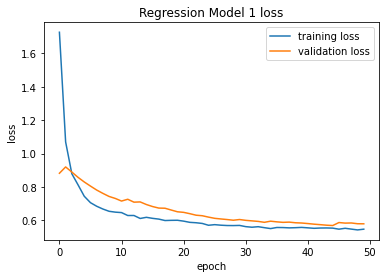

<Figure size 432x288 with 0 Axes>

In [45]:

plt.plot(training_loss1)
plt.plot(smooth_mse_history1)
plt.title('Regression Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()
plt.savefig("Regression Model 1 loss.png")

In [46]:
def regmodl2():
    # Regression model consists of input and output layer including 3 hidden layers
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(Xtrain.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [47]:
num_epochs2 = 50
# Build the Keras model (already compiled)
model2 = regmodl2()
# Train the model (in silent mode, verbose=0)
history2 = model2.fit(Xtrain, y_train,validation_data=(Xval, y_val),
          epochs=num_epochs2, batch_size=1, verbose=0)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss2 = history2.history['loss']
#mae_history2 = history2.history['val_mae']
mse_history2 = history2.history['val_loss']

smooth_mse_history2 = smooth_curve(mse_history2)

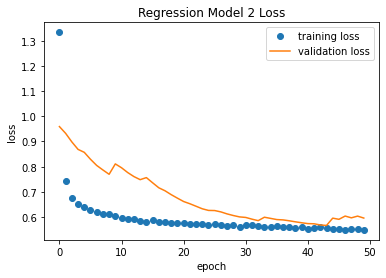

In [48]:
plt.plot(training_loss2,'o')
plt.plot(smooth_mse_history2)
#plt.plot(mse_history2)
plt.title('Regression Model 2 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()


In [20]:
def regmodl3():
    # Regression model consists of input and output layer including 3 hidden layers and each with 64 processing elements
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(Xtrain.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [22]:
num_epochs3 = 36
# Build the Keras model (already compiled)
model3 = regmodl3()
# Train the model (in silent mode, verbose=0)
history3 = model3.fit(Xtrain, y_train,validation_data=(Xval, y_val),
          epochs=num_epochs3, batch_size=1, verbose=1)
# Evaluate the model on the validation data
#val_mse, val_mae = model.evaluate(Xval, Xval, verbose=0)
#all_scores.append(val_mae)

training_loss3 = history3.history['loss']
mae_history3 = history3.history['val_mae']
mse_history3 = history3.history['val_loss']

smooth_mse_history3 = smooth_curve(mse_history3)

Epoch 1/36
4872/4872 [==============================] - 11s 2ms/step - loss: 3.5877 - mae: 1.2894 - val_loss: 0.8654 - val_mae: 0.7259
Epoch 2/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7872 - mae: 0.6868 - val_loss: 0.7334 - val_mae: 0.6690
Epoch 3/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.7146 - mae: 0.6608 - val_loss: 1.5509 - val_mae: 1.0113
Epoch 4/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6881 - mae: 0.6465 - val_loss: 0.7676 - val_mae: 0.6910
Epoch 5/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6398 - mae: 0.6254 - val_loss: 0.6807 - val_mae: 0.6487
Epoch 6/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6400 - mae: 0.6297 - val_loss: 0.5769 - val_mae: 0.5845
Epoch 7/36
4872/4872 [==============================] - 10s 2ms/step - loss: 0.6341 - mae: 0.6243 - val_loss: 0.6133 - val_mae: 0.6131
Epoch 8/36
4872/4872 [==============================] -

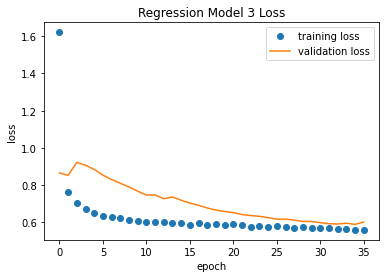

0.7139195203781128

In [23]:
plt.plot(training_loss3,'o')
plt.plot(smooth_mse_history3)
#plt.plot(mse_history3)
plt.title('Regression Model 3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()
mse_history3[-1]

In [49]:
# Saved model for regmodl3

model3.save("my_model1")

INFO:tensorflow:Assets written to: my_model1/assets


In [ ]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

#model3.layers[3].get_config()

#np.save("saved_weights.npy", weights)
#array_rain_fall_npy = np.load("saved_weights.npy")



In [50]:
model4 = models.load_model("my_model1")


val_mse, val_mae = model4.evaluate(Xval, y_val, verbose=0)

loss, accuracy = model4.evaluate(Xval, y_val, verbose=1)
#all_scores.append(val_mae)
#model4.get_weights()

!zip -r /content/my_model1.zip  /content/my_model1

#from google.colab import files
#files.download('my_model.zip')



51/51 [==============================] - 0s 1ms/step - loss: 0.7139 - mae: 0.6730
  adding: content/my_model1/ (stored 0%)
  adding: content/my_model1/variables/ (stored 0%)
  adding: content/my_model1/variables/variables.data-00000-of-00001 (deflated 49%)
  adding: content/my_model1/variables/variables.index (deflated 65%)
  adding: content/my_model1/assets/ (stored 0%)
  adding: content/my_model1/saved_model.pb (deflated 89%)


In [ ]:
!unzip my_model.zip

In [ ]:
accuracy